<a href="https://colab.research.google.com/github/ashtheflash1212/TensorFlow/blob/main/Tensorflow_CIFAR%2C_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
X_train.shape #5000 - sample size, 32 x 32 - height and width of image, 3 - RGB

(50000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,) #changing from a 2D array to a 1D array
y_test = y_test.reshape(-1,)

In [ ]:
X_train = X_train / 255.0 #scaling images to be between 0 and 1
X_test = X_test / 255.0

In [ ]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(input_shape=(32, 32, 3)), #3 because images are RGB
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') #10 categories, probabilities will sum to 1
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #sparse_categorical is used because we match the image with a specific number labels instead of one-hot encoding
              metrics=['accuracy'])

#model.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


array([[0.10644126, 0.09463593, 0.09821142, 0.09664982, 0.10728868,
        0.09086978, 0.08041483, 0.10642213, 0.11576179, 0.10330433],
       [0.11149519, 0.09357314, 0.09906938, 0.09038121, 0.11957136,
        0.09312233, 0.07855995, 0.10207815, 0.11417476, 0.09797452],
       [0.11068685, 0.09950639, 0.09554125, 0.09417372, 0.11341134,
        0.09252264, 0.08026496, 0.1044437 , 0.10791654, 0.10153259],
       [0.10939237, 0.09585371, 0.09574438, 0.09154572, 0.1129197 ,
        0.0903497 , 0.07907274, 0.10857973, 0.11289771, 0.10364424],
       [0.10471572, 0.09757893, 0.09977794, 0.09039775, 0.10909695,
        0.093027  , 0.08632208, 0.10500211, 0.11275648, 0.10132498]],
      dtype=float32)

In [ ]:
y_class = [np.argmax(element) for element in model.predict(X_test[:5])] #chooses maximum probability between each of the classes
y_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[8, 4, 4, 4, 8]

In [ ]:
y_class = [np.argmax(element) for element in model.predict(X_test)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

print("Classification Report: \n", classification_report(y_test, y_class)) #precision puts emphasis on false positives, recall puts emphasis on false negatives

Classification Report: 
               precision    recall  f1-score   support

           0       0.11      0.19      0.14      1000
           1       0.00      0.00      0.00      1000
           2       0.50      0.00      0.00      1000
           3       0.14      0.00      0.00      1000
           4       0.08      0.32      0.12      1000
           5       1.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.13      0.16      0.15      1000
           8       0.10      0.28      0.14      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.21      0.10      0.06     10000
weighted avg       0.21      0.10      0.06     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]]) #if y_test[index] = 3, then classes[3] provides the preidcted label

Exception ignored in: <function _xla_gc_callback at 0x781d1dadd750>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


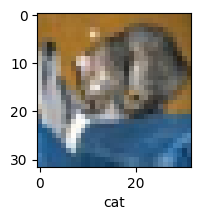

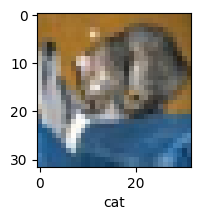

In [ ]:
plot_sample(X_test, y_test, 0)
plot_sample(X_test, y_test, 0)

In [ ]:
(X_train_two, y_train_two), (X_test_two, y_test_two) = datasets.mnist.load_data()

In [ ]:
print(X_train_two.shape)
print(y_train_two.shape)
print(y_train_two[:5])

(60000, 28, 28)
(60000,)
[5 0 4 1 9]


In [ ]:
X_train_two = X_train_two/255.0
X_test_two = X_test_two/255.0

In [ ]:
print(X_train_two.shape)
print(y_train_two.shape)

(60000, 28, 28)
(60000,)


In [ ]:
model = models.Sequential([
    layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(56, activation='relu'),
    layers.Dense(10, activation='softmax') #10 categories
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_two, y_train_two, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9014 - loss: 0.3172
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9842 - loss: 0.0537
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9891 - loss: 0.0357
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9917 - loss: 0.0261
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9942 - loss: 0.0192


In [ ]:
model.predict(X_test_two[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


array([[7.52644098e-08, 2.40309461e-09, 1.25370480e-06, 1.19909016e-09,
        7.96657351e-10, 7.81076939e-11, 3.42490318e-14, 9.99993682e-01,
        4.92401432e-06, 9.57294404e-08],
       [5.21557268e-08, 3.49969213e-07, 9.99999642e-01, 3.75275928e-13,
        7.45064843e-10, 2.49046999e-15, 1.55431028e-08, 2.95972580e-10,
        3.99697289e-12, 1.38437515e-14],
       [3.92834848e-10, 9.99999046e-01, 6.57299495e-08, 3.57301385e-12,
        2.21037794e-07, 2.02594137e-08, 2.41267855e-07, 4.99090731e-07,
        8.16860535e-09, 7.74080799e-11],
       [9.99088883e-01, 3.02990202e-11, 3.06476906e-08, 8.91781115e-13,
        1.26558893e-06, 4.51199114e-08, 9.09791735e-04, 3.24439781e-11,
        6.31191210e-10, 5.77281831e-08],
       [4.66553995e-09, 2.48584122e-08, 1.08654925e-08, 4.41603080e-13,
        9.99987841e-01, 5.47937307e-10, 3.32342367e-08, 3.20589379e-07,
        2.54101423e-07, 1.15317780e-05]], dtype=float32)

In [ ]:
predictions = [np.argmax(element) for element in model.predict(X_test_two)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
predictions[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test_two[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
print("Classification Report: \n", classification_report(y_test_two, predictions))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.97      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
classes_two = ["0","1","2","3","4","5","6","7","8","9"]

In [ ]:
def plot_sample_two(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes_two[y[index]]) #if y_test[index] = 3, then classes[3] provides the preidcted label

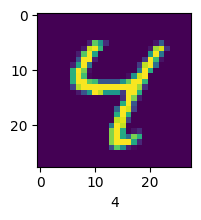

In [ ]:
plot_sample_two(X_test_two, y_test_two, 6)